In [1]:
data(iris)

In [2]:
A = iris
# Transforming the species to numerical categories :
A$Species = as.numeric(A$Species)

In [3]:
A = A[sample(nrow(A)),]

In [4]:
X = as.matrix(A[,1:(dim(A)[2] - 1)])
y = as.matrix(A[,dim(A)[2]])
y = y - min(y) + 1

In [5]:
n = dim(X)[1]
p = dim(X)[2]
k = max(y)

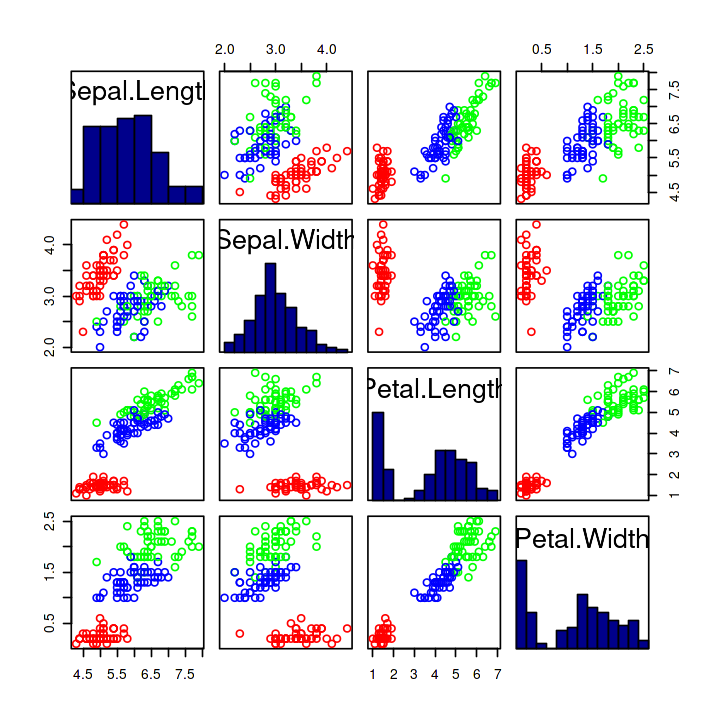

In [6]:
options(repr.plot.width=6, repr.plot.height=6)

panel.hist = function(x, ...)
{
    usr = par("usr"); on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5) )
    h = hist(x, plot = FALSE)
    breaks = h$breaks; nB <- length(breaks)
    y = h$counts
    y = y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = "darkblue")
}
pairs(X, col=c("red","blue","green")[y], diag.panel=panel.hist)

In [7]:
Xm = function(X){X - rep(colMeans(X), rep.int(nrow(X), ncol(X)))}
Cov = function(X){data.matrix(1. / (n - 1) * t(Xm(X)) %*% Xm(X))}

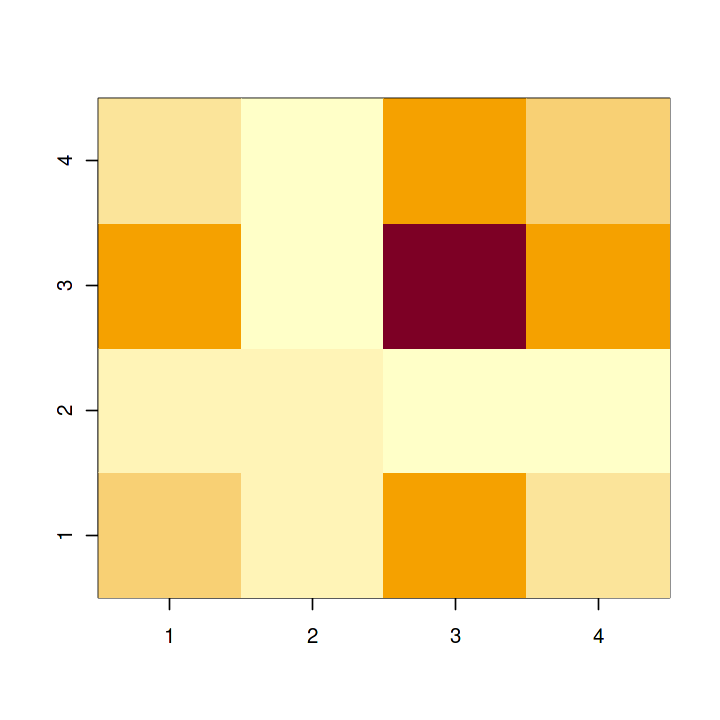

In [8]:
image(c(1:4), c(1:4), Cov(X), xlab='', ylab='')

In [9]:
svd_decomp = svd(Xm(X))
U = svd_decomp$u
D = svd_decomp$d
V = svd_decomp$v

In [10]:
Z = Xm(X) %*% V

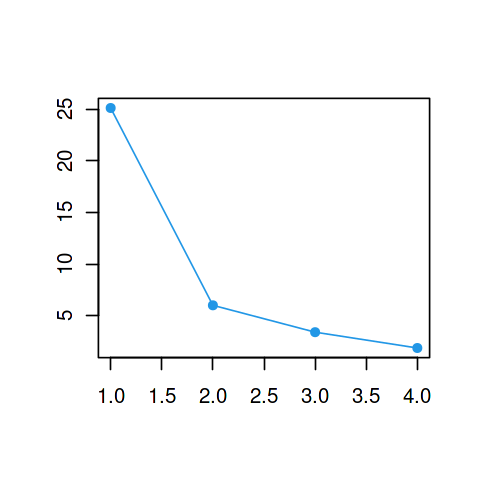

In [11]:
options(repr.plot.width=4, repr.plot.height=4)
plot(D, type="o", col=4, ylab="", xlab="", pch=16)

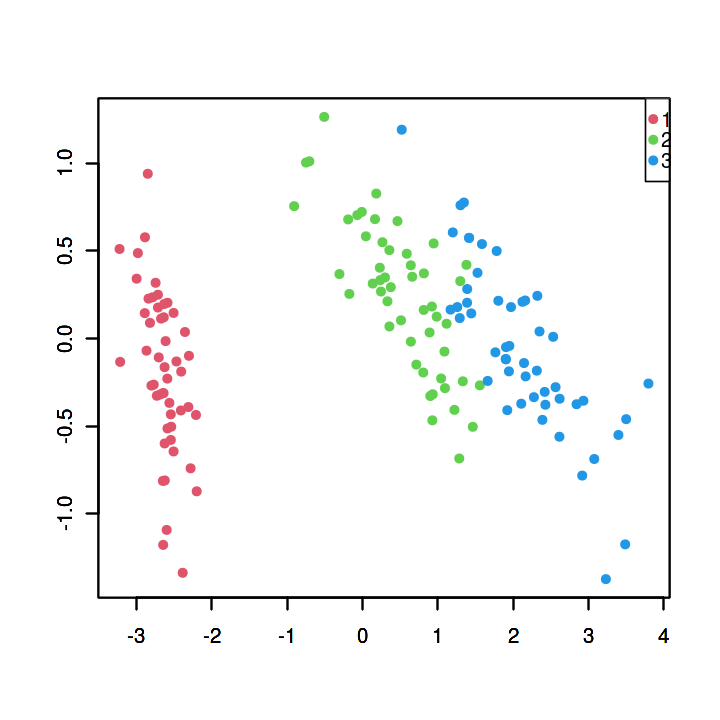

In [12]:
options(repr.plot.width=6, repr.plot.height=6)

for (i in 1:k)
{
    I = (y==i)
    plot(Z[I,1], Z[I,2], col=i + 1, xlim=c(min(Z[,1]), max(Z[,1])),  
         ylim=c(min(Z[,2]), max(Z[,2])), xlab="", ylab="", pch=16)
    par(new=TRUE)
}

cols = c(2:(k + 1))
legend("topright", legend=c(1:k), col=cols, pch=16)